In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten
from keras.preprocessing.sequence import pad_sequences


In [2]:
# Load IMDB dataset
num_words = 25000  # Limit to the top 10,000 most frequent words
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

17464789/17464789 [==============================] - 2s 0us/step


In [3]:
# Pad sequences to a maximum length of 100 (truncate longer sequences and pad shorter sequences)
maxlen = 100
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [4]:
# Define the neural network architecture
model = Sequential([
    Embedding(input_dim=num_words, output_dim=32, input_length=maxlen),
    Flatten(),
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')
])


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           800000    
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 32)                102432    
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 902465 (3.44 MB)
Trainable params: 902465 (3.44 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
196/196 [==============================] - 4s 16ms/step - loss: 0.5130 - accuracy: 0.7298 - val_loss: 0.3376 - val_accuracy: 0.8518
Epoch 2/10
196/196 [==============================] - 3s 17ms/step - loss: 0.1930 - accuracy: 0.9295 - val_loss: 0.3632 - val_accuracy: 0.8432
Epoch 3/10
196/196 [==============================] - 4s 20ms/step - loss: 0.0452 - accuracy: 0.9918 - val_loss: 0.4158 - val_accuracy: 0.8425
Epoch 4/10
196/196 [==============================] - 3s 17ms/step - loss: 0.0086 - accuracy: 0.9994 - val_loss: 0.4580 - val_accuracy: 0.8431
Epoch 5/10
196/196 [==============================] - 3s 17ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.4893 - val_accuracy: 0.8432
Epoch 6/10
196/196 [==============================] - 5s 24ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.5136 - val_accuracy: 0.8437
Epoch 7/10
196/196 [==============================] - 3s 16ms/step - loss: 9.3425e-04 - accuracy: 1.0000 - val_loss: 0.5349 - val_accuracy: 0.

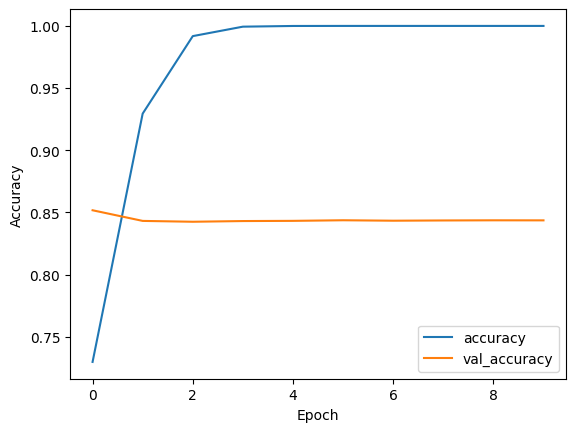

In [8]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy*100}')

782/782 [==============================] - 1s 2ms/step - loss: 0.5786 - accuracy: 0.8436
Test accuracy: 84.36400294303894
